# FSL-MRS fitting of simulated data

In [46]:
%load_ext autoreload
%autoreload 2

import numpy as np
import os
from fsl_mrs.utils import mrs_io,plotting,fitting
from fsl_mrs.core import MRS


datafolder  = '/Users/saad/Desktop/Spectroscopy/datasets_LCModel'
basisfolder = '/Users/saad/Desktop/Spectroscopy/basisset_LCModel'

ID = 15 # up to 28

# Load data and basis
FID,FIDheader = mrs_io.read_FID(os.path.join(datafolder,'dataset{}.RAW'.format(ID)))
basis,names,Bheader = mrs_io.read_basis(basisfolder)

cf = 123.2E6
bw = 4000


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [47]:
MRSArgs = {'bw':bw,'cf':cf,'basis':basis,'names':names}
FitArgs = {'method':'init',
          'baseline_order':20,
          'ppmlim':(0.2,4.2),'metab_groups':[0]*(basis.shape[1])}

mrs = MRS(FID=FID,**MRSArgs)
res = fitting.fit_FSLModel(mrs,**FitArgs) 


/Users/saad/Git/fsl_mrs/fsl_mrs/utils/fitting.py:565: RuntimeWarning:

divide by zero encountered in true_divide



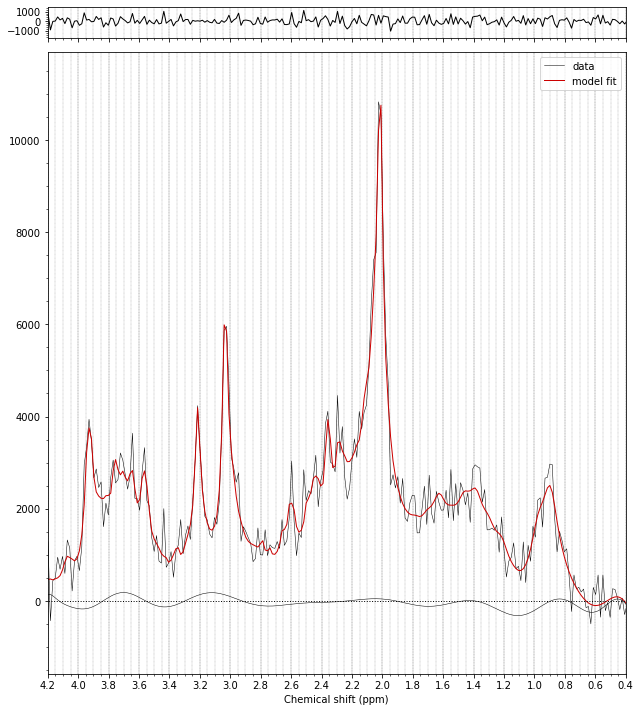

In [48]:
_ = plotting.plot_fit(mrs,pred=res.pred,baseline=res.baseline,proj='real')

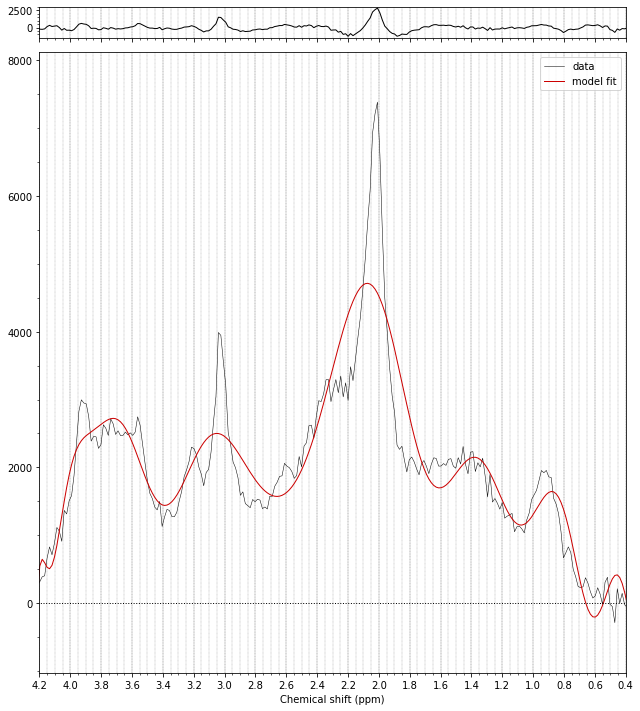

In [45]:
beta = np.linalg.pinv(res.base_poly)@mrs.Spec
pred = np.fft.ifft(res.base_poly@beta,axis=0)
_ = plotting.plot_fit(mrs,pred=pred)






/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/numeric.py:538: ComplexWarning:

Casting complex values to real discards the imaginary part



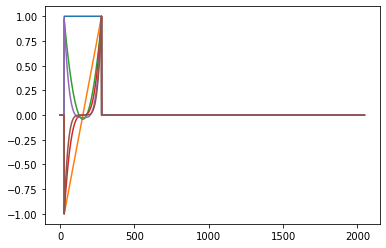

In [40]:
import matplotlib.pyplot as plt
plt.plot(res.base_poly[:,::2])